<a href="https://colab.research.google.com/github/josesg998/redesn_2024/blob/main/Clase%201/Ejercicio_6a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 6

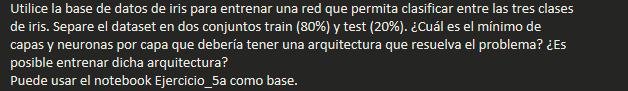

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def plot_metric(history, metric):
  plt.plot(history.history[metric], label='Training data')
  plt.plot(history.history['val_' + metric], label='Validation data')
  plt.title(metric)
  plt.ylabel(metric)
  plt.xlabel('Epoch')
  plt.legend(loc="upper right")
  plt.show()

In [3]:
iris = load_iris()
y = iris['target']
X = iris['data']

In [4]:
print(f'Número de variables:\t{X.shape[1]}')
print(f'Número de salidas:\t{len(set(y))}')

Número de variables:	4
Número de salidas:	3


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train, num_classes=3)
y_test  = to_categorical(y_test, num_classes=3)

In [7]:
# Verificar si el objeto 'model' ya existe y eliminarlo
if 'modelo' in locals():
    print('Borramos el modelo\n')
    del modelo

# Crear una red que sea capaz de resolver el problema

d_in = 4  # Número de variables de entrada.
d_out = 3 # Número de salidas. La misma que la cantidad de clases (usando one_hot)

modelo = Sequential([
    Dense(3, input_shape=(d_in,), activation="tanh"),
    Dense(d_out, activation="softmax")
	])

modelo.compile(
  optimizer = SGD(learning_rate=0.01),
  loss = 'categorical_crossentropy', metrics = ['accuracy']
)

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Entrenamiento del modelo y ploteo de las métricas
history = modelo.fit(X_train, y_train, epochs=200, batch_size=16, verbose=False, validation_split=0.2)

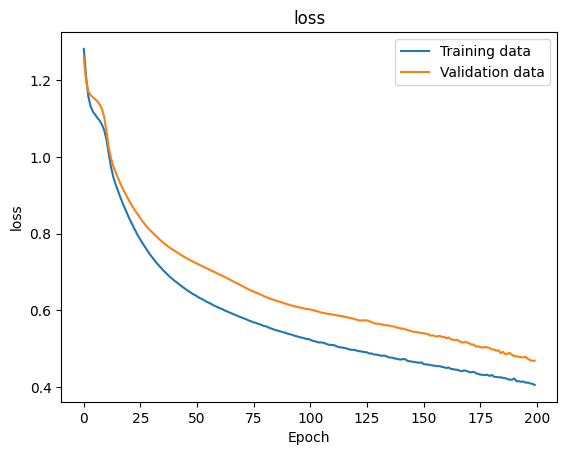

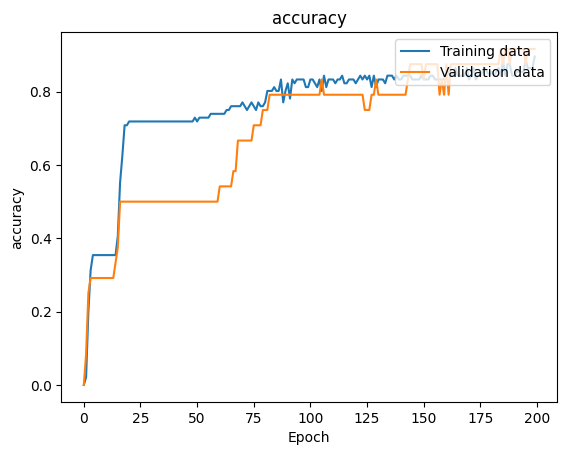

In [11]:
plot_metric(history, "loss")
plot_metric(history, "accuracy")

In [12]:
# Evaluar el modelo
loss, accuracy = modelo.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

# Predicción sobre el conjunto de prueba (opcional)
predictions = modelo.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Imprimir algunas predicciones
for i in range(5):
    print(f"Predicción: {predicted_classes[i]}, Verdadero: {true_classes[i]}")

Precisión en el conjunto de prueba: 0.87
1/1 [==============================] - 0s 29ms/step
Predicción: 1, Verdadero: 1
Predicción: 0, Verdadero: 0
Predicción: 2, Verdadero: 2
Predicción: 1, Verdadero: 1
Predicción: 1, Verdadero: 1
